In [33]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import networkx as nx

from pandas.io.json import json_normalize

In [57]:
# LOAD AND FORMAT DATA
nodes_temp = pd.read_json('list_of_nodes.json')
nodes_table = json_normalize(nodes_temp['nodes'])

channels_temp = pd.read_json('list_of_channels.json')
channels_table = json_normalize(channels_temp['channels'])

# display(nodes_table.head())
# display(channels_table.head())

### Network Properties

In [61]:
# MAKE GRAPH
G = nx.Graph()

G.add_nodes_from(nodes_table['nodeid'])

edges_list = [(channels_table['source'][i], channels_table['destination'][i]) for i in range(len(channels_table))]
G.add_edges_from(edges_list)

print('Number of nodes = ' + str(len(G.nodes())))
print('Number of edges (payment channels) = ' + str(len(G.edges())))

Number of nodes = 2612
Number of edges (payment channels) = 8066


In [50]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(G)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(G)

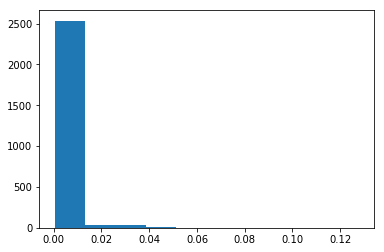

In [52]:
plt.hist(deg_cen.values())
plt.show()

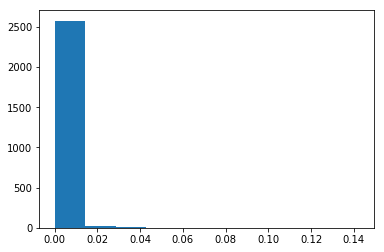

In [53]:
plt.hist(bet_cen.values())
plt.show()

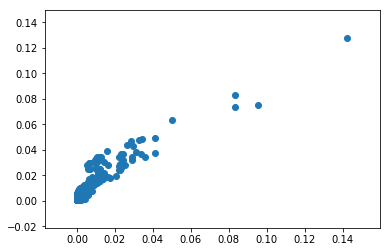

In [55]:
plt.scatter(x = list(bet_cen.values()), y = list(deg_cen.values()));


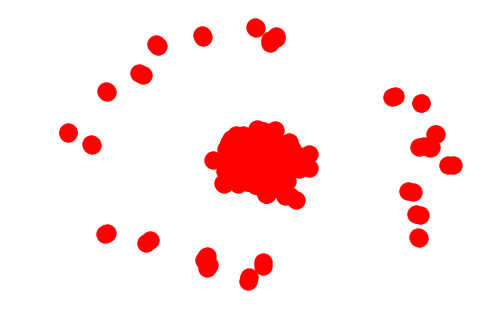

In [44]:
nx.draw(G, with_labels=False, font_weight='bold')

In [47]:

from nxviz import CircosPlot
from nxviz import ArcPlot

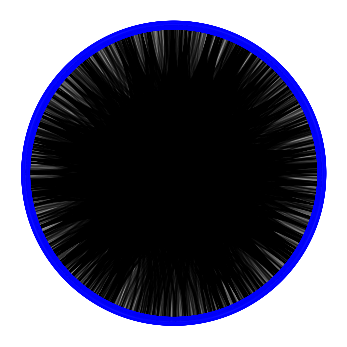

In [48]:
h = CircosPlot(G)

# Draw the ArcPlot to the screen
h.draw()
plt.show()


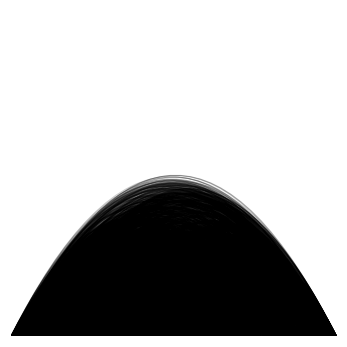

In [49]:
b = ArcPlot(G)

# Draw the ArcPlot to the screen
b.draw()
plt.show()

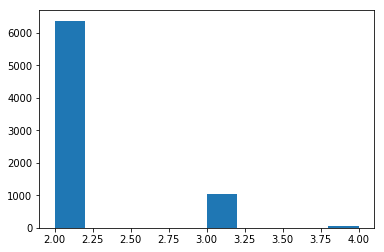

In [65]:
# Clique size distribution
cliques = list(nx.find_cliques(G))
cliq_len = [len(cliques[i]) for i in range(len(cliques))]

plt.hist(cliq_len);